# Modelos de Aprendizado de Máquina
Neste notebook tem os seguintes modelos de aprendizado de máquina comparados:
- Floresta Aleatória
- SVM

## **Prepare Environment**

<br/>

### Imports

In [2]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

<br/>

### Prepare Principal Directory

In [3]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [4]:
path_to_work('notebooks')

'/home/campos/projects/tcc-ufsc-grad/notebooks'

<br/>

### Set Config

In [5]:
# Visualization inside the jupyter
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [6]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

<br/>

### Load Data

In [7]:
%%time

df_vale3 = pd.read_csv('data/cleansing/df_vale3_cleansing.csv',
                        encoding='utf8',
                        delimiter=',',
                        parse_dates=True,
                        index_col=0,
                        verbose=True)

Tokenization took: 3.43 ms
Type conversion took: 3.10 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 11.9 ms, sys: 936 µs, total: 12.8 ms
Wall time: 13.9 ms


In [8]:
print(df_vale3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2445 entries, 2010-07-12 to 2020-05-28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preco         2445 non-null   float64
 1   residuos      2445 non-null   float64
 2   tendencia     2445 non-null   float64
 3   sazonalidade  2445 non-null   float64
 4   diff_1        2445 non-null   float64
 5   diff_2        2445 non-null   float64
 6   diff_3        2445 non-null   float64
 7   diff_4        2445 non-null   float64
 8   diff_5        2445 non-null   float64
dtypes: float64(9)
memory usage: 191.0 KB
None


In [9]:
df_vale3.head()

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2010-07-12,40.000000,1.002310,41.827333,1.000149,-0.600000,-0.460000,0.490000,0.980000,0.420000
2010-07-13,40.070000,1.036654,41.910833,0.998563,0.070000,-0.530000,-0.390000,0.560000,1.050000
2010-07-14,40.080000,1.028377,41.977833,1.000439,0.010000,0.080000,-0.520000,-0.380000,0.570000
2010-07-15,39.760000,1.044658,42.045833,1.000935,-0.320000,-0.310000,-0.240000,-0.840000,-0.700000
2010-07-16,38.880000,1.028132,42.123500,1.001784,-0.880000,-1.200000,-1.190000,-1.120000,-1.720000


---

## **Split Data**

In [10]:
size_train = 2132
size_test = 313
print(size_train)
print(size_test)

df_train = df_vale3.iloc[:size_train]
df_test = df_vale3.iloc[size_train:]
print(df_train.columns)
print(df_test.columns)

2132
313
Index(['preco', 'residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')
Index(['preco', 'residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')


In [11]:
df_vale3_without_target = df_train.columns
df_vale3_without_target = df_vale3_without_target.drop('preco')

print(df_vale3_without_target)

Index(['residuos', 'tendencia', 'sazonalidade', 'diff_1', 'diff_2', 'diff_3',
       'diff_4', 'diff_5'],
      dtype='object')


Text(0.5, 1.0, 'Train size: 2132')

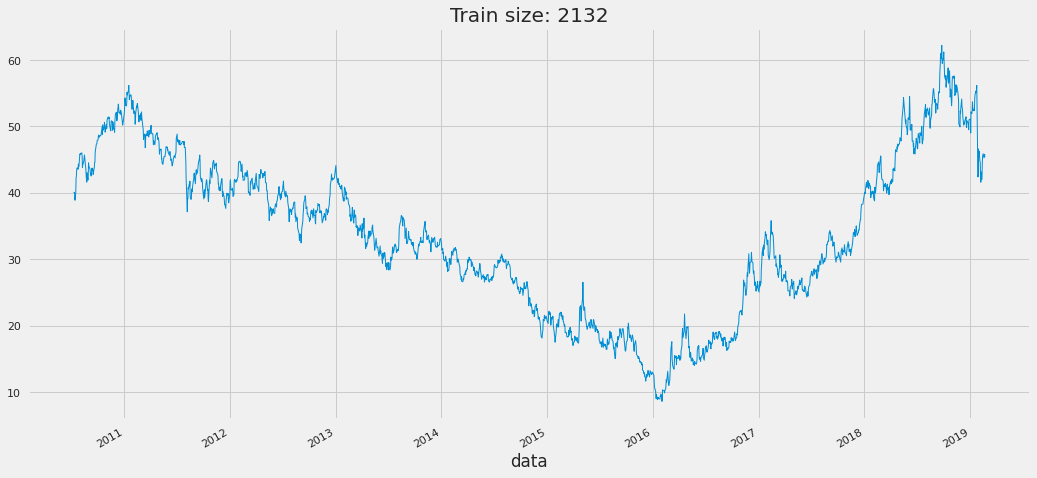

In [12]:
df_train['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 313')

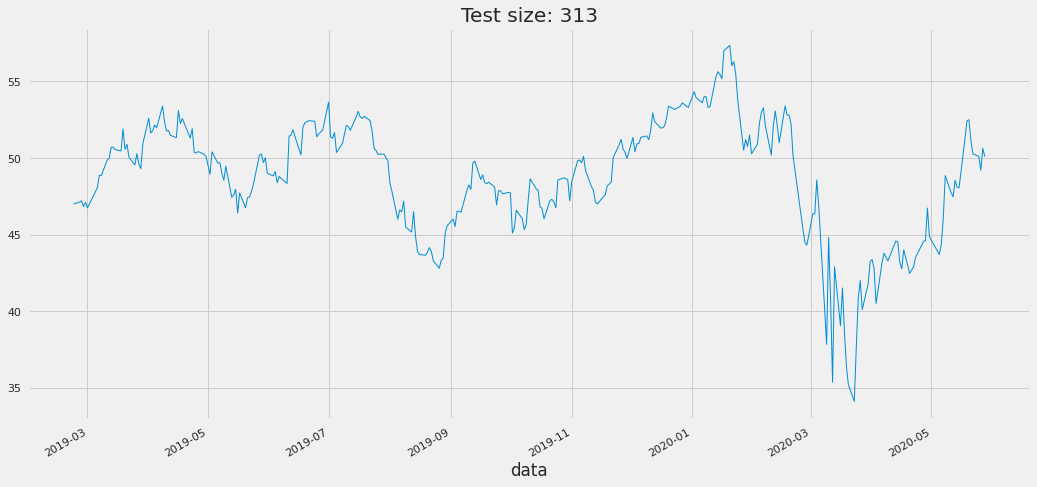

In [13]:
df_test['preco'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [14]:
df_train.index

DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21'],
              dtype='datetime64[ns]', name='data', length=2132, freq=None)

In [15]:
df_test.index

DatetimeIndex(['2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='data', length=313, freq=None)

In [16]:
X_train = df_train[df_vale3_without_target]
y_train = df_train['preco']
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))
print((X_train[:5]))
print(y_train[:5])


X_train = df_train[df_vale3_without_target]
y_train = df_train['preco']

2132
2132
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade    diff_1    diff_2    diff_3  \
data                                                                          
2010-07-12  1.002310  41.827333      1.000149 -0.600000 -0.460000  0.490000   
2010-07-13  1.036654  41.910833      0.998563  0.070000 -0.530000 -0.390000   
2010-07-14  1.028377  41.977833      1.000439  0.010000  0.080000 -0.520000   
2010-07-15  1.044658  42.045833      1.000935 -0.320000 -0.310000 -0.240000   
2010-07-16  1.028132  42.123500      1.001784 -0.880000 -1.200000 -1.190000   

              diff_4    diff_5  
data                            
2010-07-12  0.980000  0.420000  
2010-07-13  0.560000  1.050000  
2010-07-14 -0.380000  0.570000  
2010-07-15 -0.840000 -0.700000  
2010-07-16 -1.120000 -1.720000  
data
2010-07-12   40.000000
2010-07-13   40.070000
2010-07-14   40.080000
2010-07-15   39.760000
2010-07-16   38.880000
Name: preco

In [17]:
X_test = df_test[df_vale3_without_target]
y_test = df_test['preco']
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))
print(X_test[:5])
print(y_test[:5])

313
313
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residuos  tendencia  sazonalidade    diff_1    diff_2    diff_3  \
data                                                                          
2019-02-22  0.963506  46.696167      1.000439  1.610000  1.190000  1.500000   
2019-02-25  0.933996  46.888333      1.000935  0.130000  1.740000  1.320000   
2019-02-26  0.938870  47.090500      1.001784  0.080000  0.210000  1.820000   
2019-02-27  0.891661  47.321167      1.000287 -0.370000 -0.290000 -0.160000   
2019-02-28  0.880628  47.580333      1.001320  0.270000 -0.100000 -0.020000   

             diff_4   diff_5  
data                          
2019-02-22 1.740000 1.110000  
2019-02-25 1.630000 1.870000  
2019-02-26 1.400000 1.710000  
2019-02-27 1.450000 1.030000  
2019-02-28 0.110000 1.720000  
data
2019-02-22   46.990000
2019-02-25   47.120000
2019-02-26   47.200000
2019-02-27   46.830000
2019-02-28   47.100000
Name: preco, dtype: float64

---

---

## **Evaluation**

In [18]:
dict_results = {}

<br/>

### Display Results

In [19]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['previsao'])
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]
    
    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Tempo (dias)", fontsize=20)
    plt.ylabel("Preço (R$)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

---

## **Modeling**

<br/>

### **Build Model**

#### **Random Forest**

In [20]:
# RandomForest params dict
rf_params_one = {}
rf_params_one['criterion'] = 'mse'
rf_params_one['n_estimators'] = 10
rf_params_one['max_depth'] = 5
rf_params_one['max_features'] = None
rf_params_one['max_leaf_nodes'] = 15
rf_params_one['min_samples_leaf'] = 1
rf_params_one['random_state'] = 0
rf_params_one['n_jobs'] = -1 # run all process

In [21]:
model_rf_regressor = RandomForestRegressor(**rf_params_one)
model_rf_regressor

RandomForestRegressor(max_depth=5, max_features=None, max_leaf_nodes=15,
                      n_estimators=10, n_jobs=-1, random_state=0)

In [22]:
model_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=None, max_leaf_nodes=15,
                      n_estimators=10, n_jobs=-1, random_state=0)

In [23]:
y_pred_rf_regressor = model_rf_regressor.predict(X_test)
y_pred_rf_regressor[:5]

array([46.87773307, 46.87773307, 46.87773307, 46.87773307, 46.87773307])

In [24]:
len(y_train)

2132

In [25]:
len(y_test)

313

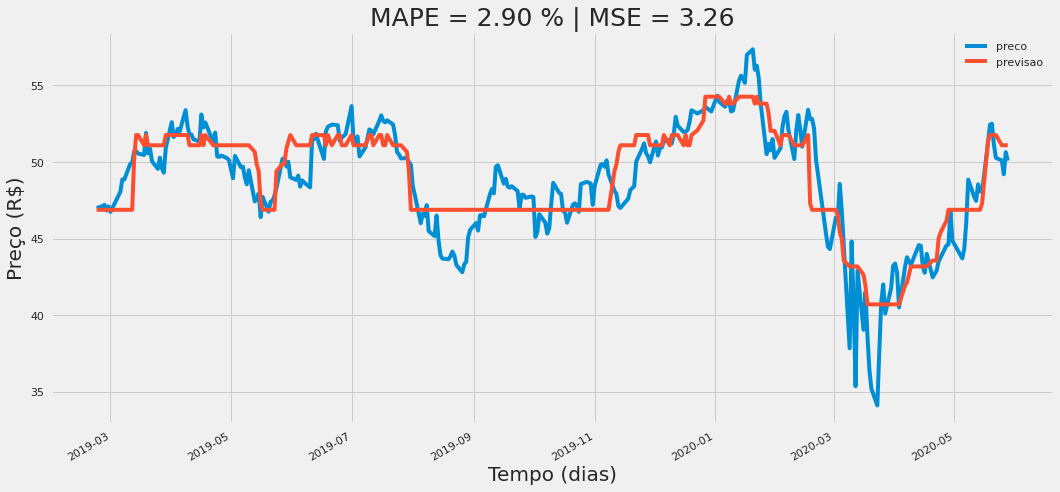

In [26]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

---

<br/>

#### **SVM**
- Doc sobre gamma: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
- Gamma é quem controla o learning rate

In [27]:
model_svm_regressor = SVR(kernel='rbf', gamma= 0.1)
model_svm_regressor

SVR(gamma=0.1)

In [28]:
model_svm_regressor.fit(X_train, y_train)

SVR(gamma=0.1)

In [29]:
y_pred_svm_regressor = model_svm_regressor.predict(X_test)
y_pred_svm_regressor[:5]

array([45.99084802, 47.55431383, 47.58521492, 47.0727281 , 47.54548022])

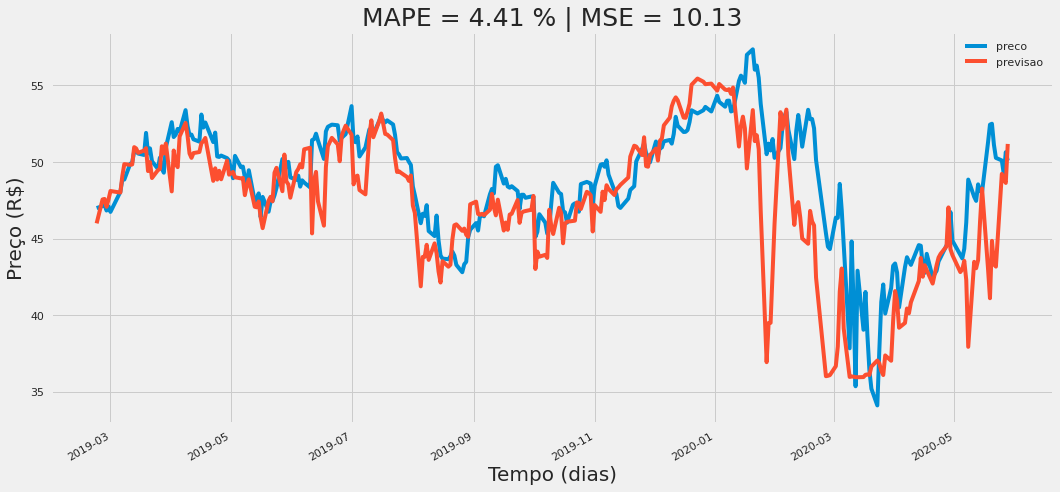

In [30]:
show_result_model(df_train=y_train,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

#### Zoom

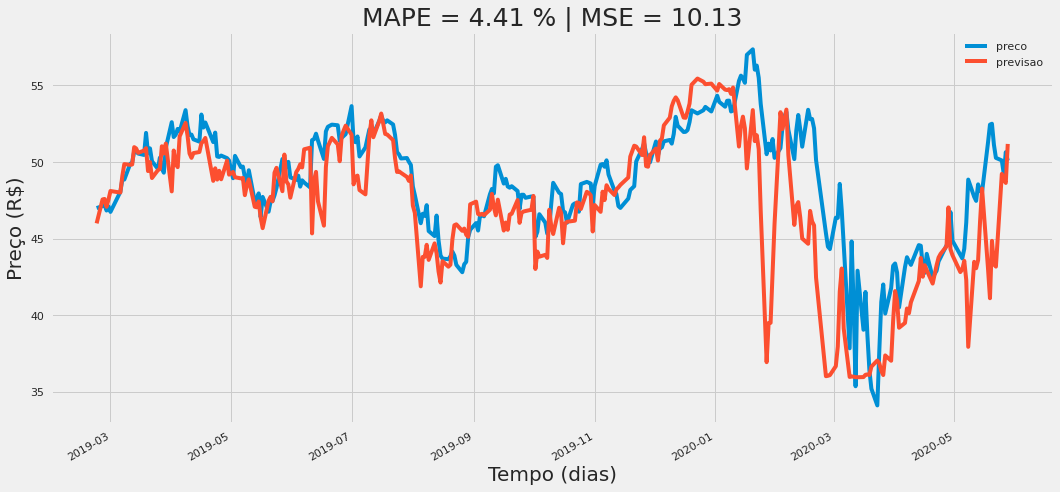

In [31]:
show_result_model(df_train=y_test,
                  df_test=y_test, 
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

---

## **Results**

In [32]:
dict_results

{'model_rf_regressor': [2.9030604441613783, 3.2572285019921856],
 'model_svm_regressor': [4.408421946404582, 10.128906074086462]}

---